# <span style=color:purple>House price prediction</span>
### รายชื่อสมาชิกกลุ่ม
* วรท กาญจนาคม 6209656070
* ณัฐจิรา จมูศรี 6209656112
* ศุกลภัทร ชิณวงศ์ 6209656203
* เรณุกา สิมะดำรงค์ 6209656351
* ณัฐวัฒน์ พราหมณ์นาค 6209656518

---

## สารบัญ  
* [Import Data](#Import-Data)
* [Linear Regression](#เรียกใช้-Linear-Regression)
    - [Data Relations](#ดูความสัมพันธ์ของข้อมูล)
    - [Predicted Value](#ค่าที่-Predict-ได้)
    - [Error Value](#ดูค่า-Error)
* [Plot Graph](#นำข้อมูลมา-Plot-Graph)
    - [Number of City](#ดูจำนวนแต่ละ-City)
    - [City vs. Price](#นำ-City-มาเทียบกับ-Price)
    - [Sqft_living vs. Price](#นำ-Sqft_living-เทียบกับ-Price)
    - [Sqft_lot vs. Price](#นำ-Sqft_lot-เทียบกับ-Price)
    - [Outlier Value](#เรียกดูค่า-Outlier)
    - [Drop Outlier](#Drop-ค่า-Outlier)
    - [After drop Outlier](#เรียกดูค่า-City-เทียบกับ-Price-หลังตัดค่า-Outlier)
    - [Price = 0](#เรียกดูค่า-Price-=-0)
    - [Drop price = 0](#Drop-ค่า-Price-=-0)
* [Bellevue City](#Bellevue-City)
    - [Data vs. Price](#เทียบข้อมูล-Bellevue-City-กับค่า-Price)
    - [Train&Test](#แบ่งข้อมูล-Train&Test-ของ-Bellevue-City)
    - [Data Relations](#ดูความสัมพันธ์ของข้อมูล-(B))
    - [Predicted Value](#ดูค่าที่-Predict-(B))
    - [Error Value](#เรียกดูค่า-Error-(B))
    - [Plot Graph](#นำข้อมูลมา-Plot-Graph-(B))
    - [Sort Test](#นำค่า-Test-มาจัดเรียงเพื่อดู-Graph-ให้ง่ายขึ้น-(B))
* [Seattle City](#Seattle-City)
    - [Data vs. Price](#เทียบข้อมูล-Seattle-City-กับค่า-Price)
    - [Train&Test](#แบ่งข้อมูล-Train&Test-ของ-Seattle-City)
    - [Data Relations](#ดูความสัมพันธ์ของข้อมูล-(S))
    - [Predicted Value](#ดูค่าที่-Predict-(S))
    - [Error Value](#เรียกดูค่า-Error-(S))
    - [Plot Graph](#นำข้อมูลมา-Plot-Graph-(S))
    - [Sort Test](#นำค่า-Test-มาจัดเรียงเพื่อดู-Graph-ให้ง่ายขึ้น-(S))
* [Kent City](#Kent-City)
    - [Data vs. Price](#เทียบข้อมูล-Kent-City-กับค่า-Price)
    - [Train&Test](#แบ่งข้อมูล-Train&Test-ของ-Kent-City)
    - [Data Relations](#ดูความสัมพันธ์ของข้อมูล-(K))
    - [Predicted Value](#ดูค่าที่-Predict-(K))
    - [Error Value](#เรียกดูค่า-Error-(K))
    - [Plot Graph](#นำข้อมูลมา-Plot-Graph-(K))
    - [Sort Test](#นำค่า-Test-มาจัดเรียงเพื่อดู-Graph-ให้ง่ายขึ้น-(K))

---

## Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [3]:
dataset = pd.read_csv('data.csv')
dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


## เปลี่ยน Bathrooms&Price เป็นจำนวนเต็ม

In [4]:
dataset['bathrooms'] = dataset['bathrooms'].astype('int')
dataset['price'] = dataset['price'].astype('int')
dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000,3.0,1,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000,5.0,2,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000,3.0,2,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000,3.0,2,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000,4.0,2,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166,3.0,1,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333,3.0,2,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904,3.0,2,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400,4.0,2,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


## ตัดข้อมูลบางตัว เพื่อเทียบกับ Price
#### ตัด City, View, Yr_built, Yr_renovated, Street, Statezip & Country

In [5]:
n=dataset[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','condition','sqft_above','sqft_basement']]
m=dataset['price']

In [6]:
X = (n.values).reshape(4600,9)
y = (m.values).reshape(4600,1)

---

## แบ่งข้อมูล Train&Test  

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
print(f'Train X: {X_train.shape}')
print(f'Train y: {y_train.shape}')
print(f'Test X: {X_test.shape}')
print(f'Test y: {y_test.shape}')

Train X: (3680, 9)
Train y: (3680, 1)
Test X: (920, 9)
Test y: (920, 1)


---

## เรียกใช้ Linear Regression

In [8]:
reg = LinearRegression()

In [9]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### ดูว่า X กับ Y มีความสัมพันธ์เป็นเส้นตรงกันหรือไม่

In [10]:
reg.score(X_train,y_train)

0.186562463248391

### ดูความสัมพันธ์ของข้อมูล 

In [11]:
reg.coef_

array([[-5.23377613e+04,  3.55738089e+04,  1.76220474e+02,
        -6.60665623e-01,  8.06815887e+03,  7.22213316e+05,
         6.02652727e+04,  8.42279379e+01,  9.19925361e+01]])

### ค่าที่ Predict ได้

In [12]:
reg.predict(X_test[0].reshape((1,-1)))[0]

array([563264.82373878])

In [13]:
y_test[0]

array([389000])

In [14]:
y_pred = reg.predict(X_test)
y_pred.shape

(920, 1)

---

## ดูค่า Error  
#### ดูค่าความ Error ข้อมูล Train&Test ของเรา โดยเอาทศนิยมเพียง 4 ตำแหน่ง

In [15]:
score = mean_squared_error(y_test, y_pred)
d=mean_absolute_error(y_test, y_pred)
print('mean_squred_error= {:.4f}'.format(score))
print('mean_absolute_error= {:.4f}'.format(d))

mean_squred_error= 73435016446.1813
mean_absolute_error= 174541.6038


## นำข้อมูลมา Plot Graph

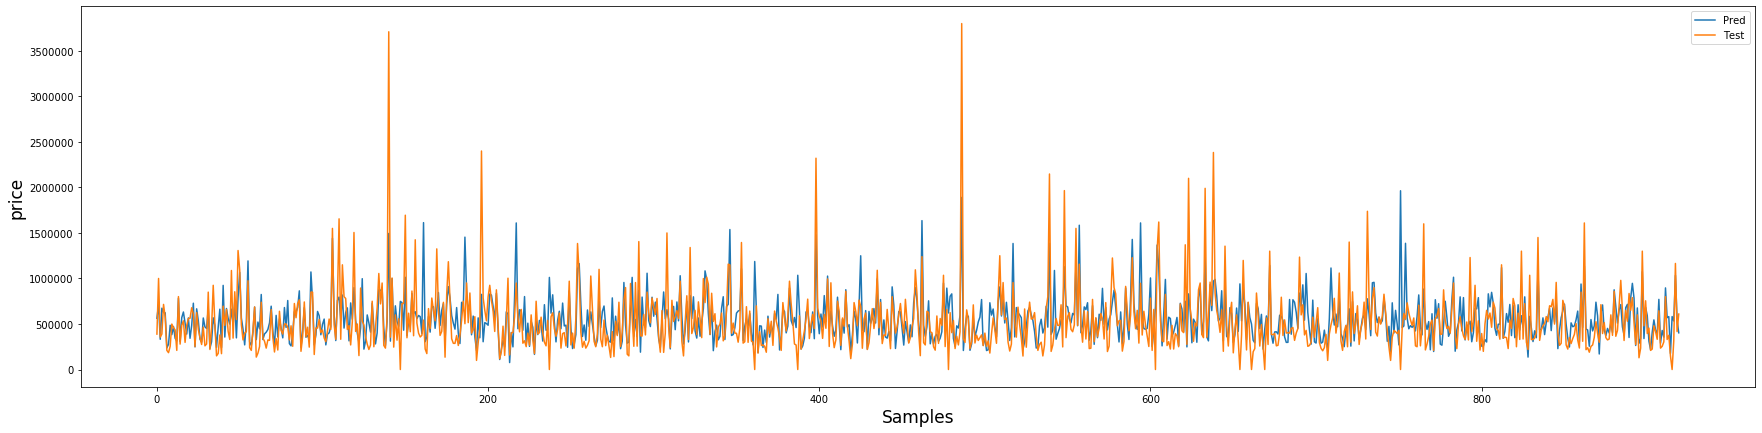

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[30,7])
plt.plot(y_pred)
plt.plot(y_test)
plt.xlabel('Samples',fontsize=17)
plt.ylabel('price',fontsize=17)
plt.legend(['Pred', 'Test'])

## นำข้อมูลมา Sort เพื่อดู Graph ให้ง่ายขึ้น

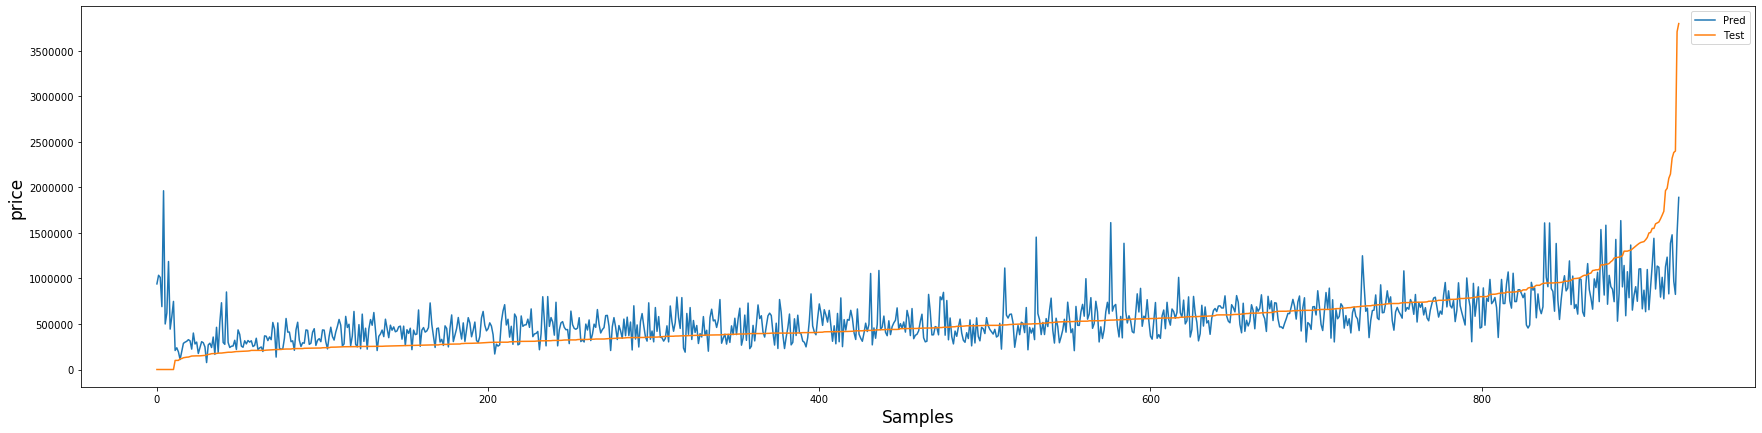

In [17]:
plt.figure(figsize=[30,7])
y_pred=y_pred.reshape(920,)
y_test=y_test.reshape(920,)
idx=np.argsort(y_test)
plt.plot(y_pred[idx])
plt.plot(y_test[idx])
plt.xlabel('Samples',fontsize=17)
plt.ylabel('price',fontsize=17)
plt.legend(['Pred', 'Test'])

### ดูจำนวนแต่ละ City
#### คาดว่า City น่าจะมีผลต่อการ Predict Price จึงเรียกดูจำนวนของ City

In [18]:
dataset['city'].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Tukwila                  29
Vashon                   29
SeaTac                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Medina                   11
Clyde Hill               11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

### นำ City มาเทียบกับ Price

Text(0, 0.5, 'Price')

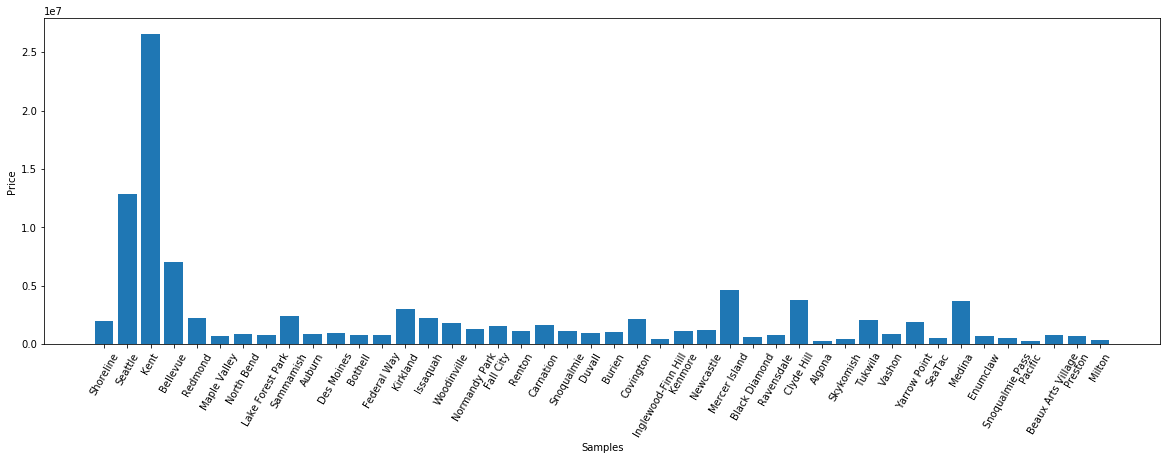

In [19]:
x=dataset['city']
y=dataset['price']
plt.figure(figsize=[20,6])
plt.bar(x,y)
plt.xticks(rotation=60)
plt.xlabel('Samples')
plt.ylabel('Price')

### นำ Sqft_living เทียบกับ Price

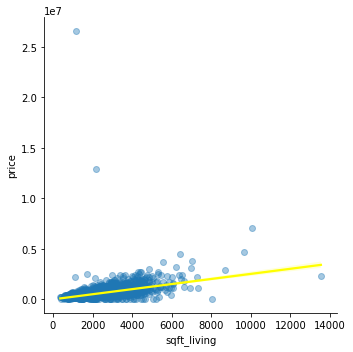

In [21]:
sns.lmplot(x="sqft_living",
         y="price", 
        data=dataset,
        scatter_kws={"alpha": 0.4},
        line_kws={'color':'yellow'}
           )

### นำ Sqft_lot เทียบกับ Price

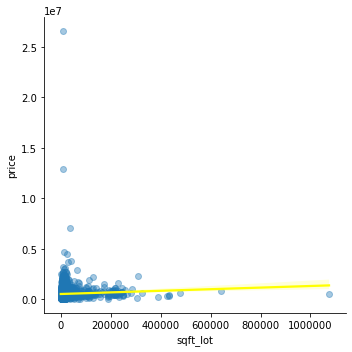

In [22]:
sns.lmplot(x="sqft_lot",
        y="price", 
        data=dataset,
        scatter_kws={"alpha": 0.4},
        line_kws={'color':'yellow'}
           )

### เรียกดูค่า Outlier
#### ค่า Outlier ของ Price

In [23]:
dataset[dataset['price']>10000000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4346,2014-06-23 00:00:00,12899000,3.0,2,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,WA 98199,USA
4350,2014-07-03 00:00:00,26590000,3.0,2,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA


### Drop ค่า Outlier

In [24]:
dataset = dataset.drop(4346, axis=0)
dataset = dataset.drop(4350, axis=0)
dataset.reset_index(drop=True)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000,3.0,1,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000,5.0,2,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000,3.0,2,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000,3.0,2,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000,4.0,2,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,2014-07-09 00:00:00,308166,3.0,1,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4594,2014-07-09 00:00:00,534333,3.0,2,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4595,2014-07-09 00:00:00,416904,3.0,2,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4596,2014-07-10 00:00:00,203400,4.0,2,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


### เรียกดูค่า City เทียบกับ Price หลังตัดค่า Outlier

Text(0, 0.5, 'Price')

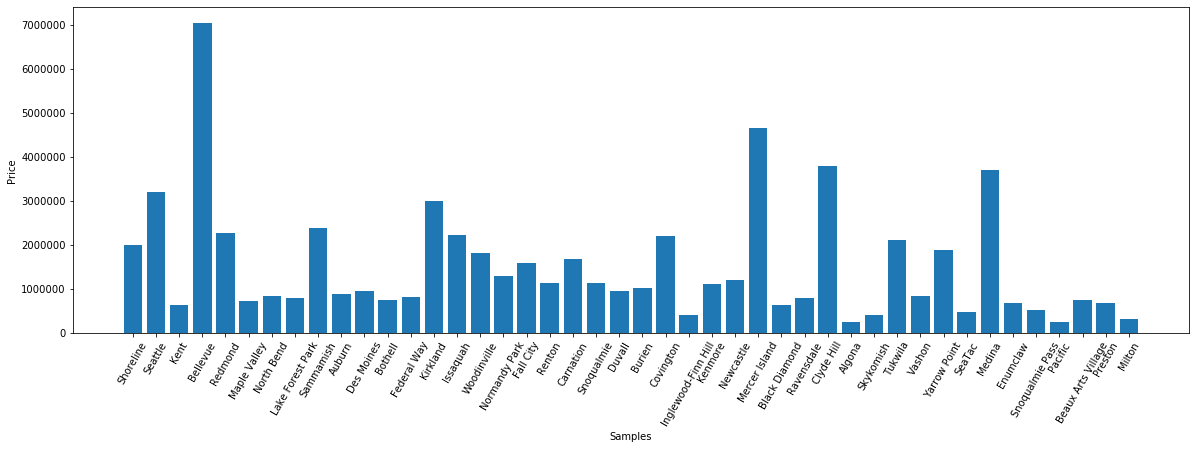

In [25]:
x=dataset['city']
y=dataset['price']
plt.figure(figsize=[20,6])
plt.bar(x,y)
plt.xticks(rotation=60)
plt.xlabel('Samples')
plt.ylabel('Price')

### เรียกดูค่า Price = 0

In [26]:
dataset[dataset['price']<=0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0,3.0,1,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0,4.0,2,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0,6.0,2,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0,5.0,3,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0,5.0,1,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA
4362,2014-05-07 00:00:00,0,4.0,4,3680,18804,2.0,0,0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074,USA
4374,2014-05-09 00:00:00,0,2.0,2,2200,188200,1.0,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,USA
4376,2014-05-09 00:00:00,0,4.0,2,2170,10500,1.0,0,2,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166,USA
4382,2014-05-12 00:00:00,0,5.0,4,4630,6324,2.0,0,0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065,USA
4383,2014-05-13 00:00:00,0,5.0,4,4430,9000,2.0,0,0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004,USA


### Drop ค่า Price = 0

In [27]:
dataset.drop(dataset.loc[dataset['price']==0].index, inplace=True)

In [28]:
dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000,3.0,1,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000,5.0,2,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000,3.0,2,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000,3.0,2,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000,4.0,2,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166,3.0,1,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333,3.0,2,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904,3.0,2,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400,4.0,2,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


---

## Bellevue City  
#### เลือกดู Bellevue เพราะว่า กราฟหลังจากที่ตัด Outlier แล้ว มีค่าสูงที่สุด

In [29]:
city_1=dataset[dataset['city']=='Bellevue']
city_1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3,2014-05-02 00:00:00,420000,3.0,2,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
16,2014-05-02 00:00:00,419000,3.0,1,1570,6700,1.0,0,0,4,1570,0,1956,0,15424 SE 9th St,Bellevue,WA 98007,USA
21,2014-05-02 00:00:00,435000,4.0,1,1450,8800,1.0,0,0,4,1450,0,1954,1979,3922 154th Ave SE,Bellevue,WA 98006,USA
55,2014-05-02 00:00:00,430000,4.0,1,1920,10000,1.0,0,0,4,1070,850,1954,1979,4071 156th Ave SE,Bellevue,WA 98006,USA
78,2014-05-05 00:00:00,755000,4.0,2,2120,10202,1.0,0,0,4,1620,500,1960,2001,12645 SE 27th St,Bellevue,WA 98005,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4500,2014-06-17 00:00:00,540000,3.0,2,2750,18029,1.0,0,2,5,1810,940,1978,0,4708 154th Pl SE,Bellevue,WA 98006,USA
4533,2014-06-24 00:00:00,391400,4.0,1,1250,7400,1.0,0,0,5,1250,0,1959,0,1039 165th Pl NE,Bellevue,WA 98008,USA
4583,2014-07-07 00:00:00,282766,4.0,2,1700,8640,1.0,0,0,3,850,850,1955,2010,3706 140th Ave SE,Bellevue,WA 98006,USA
4584,2014-07-07 00:00:00,486445,3.0,1,1880,10032,1.0,0,0,4,1880,0,1984,0,13345 SE 55th Pl,Bellevue,WA 98006,USA


### เทียบข้อมูล Bellevue City กับค่า Price

In [30]:
a=city_1[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','condition','sqft_above','sqft_basement']]
b=city_1['price']

In [31]:
X = (a.values).reshape(281,9)
y = (b.values).reshape(281,1)

### แบ่งข้อมูล Train&Test ของ Bellevue City 

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print(f'Train X: {X_train.shape}')
print(f'Train y: {y_train.shape}')
print(f'Test X: {X_test.shape}')
print(f'Test y: {y_test.shape}')

Train X: (196, 9)
Train y: (196, 1)
Test X: (85, 9)
Test y: (85, 1)


In [33]:
reg = LinearRegression()

In [34]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
reg.score(X_train,y_train)

0.7721680161958417

### ดูความสัมพันธ์ของข้อมูล (B)

In [36]:
reg.coef_

array([[-8.12987532e+04,  2.35140126e+04,  1.98289410e+02,
         1.79387386e+00, -1.76988569e+05,  2.65023071e+06,
         6.30038919e+04,  1.96009312e+02,  2.28009867e+00]])

### ดูค่าที่ Predict (B)

In [37]:
y_pred = reg.predict(X_test)
y_pred.shape

(85, 1)

In [38]:
print(reg.predict(X_test[0].reshape((1,-1)))[0])

[836457.11587245]


In [39]:
y_test[0]

array([645000])

### เรียกดูค่า Error (B)

In [40]:
score = mean_squared_error(y_test, y_pred)
d=mean_absolute_error(y_test, y_pred)
print('mean_squred_error= {:.4f}'.format(score))
print('mean_absolute_error= {:.4f}'.format(d))

mean_squred_error= 127469820403.7936
mean_absolute_error= 214802.0872


### นำข้อมูลมา Plot Graph (B)

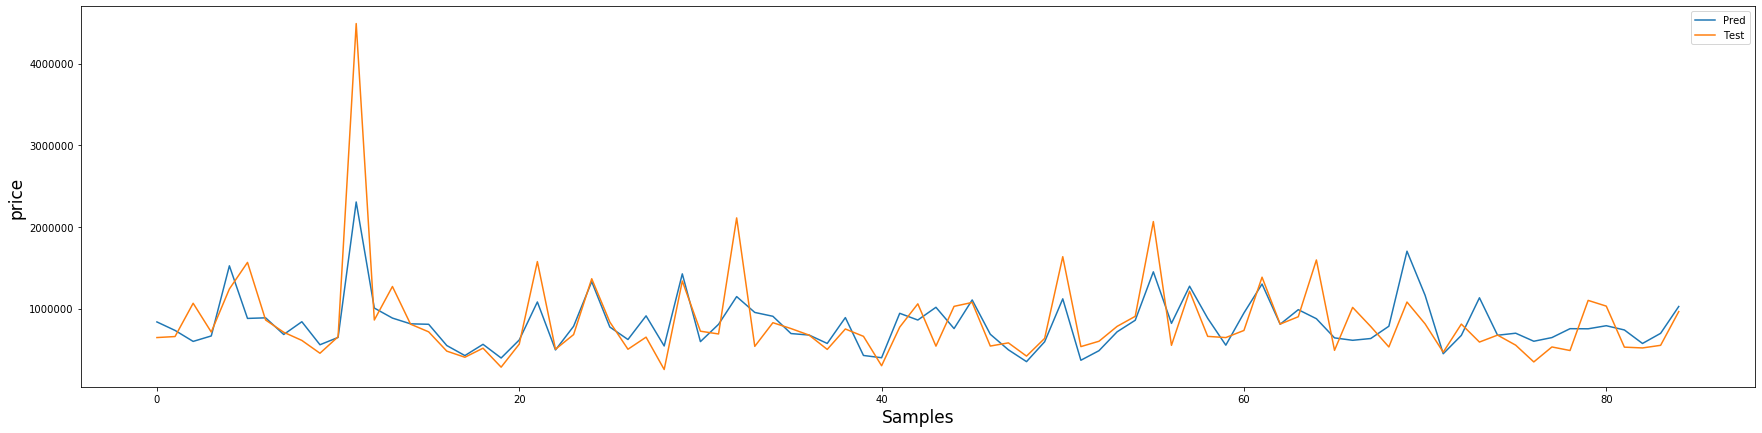

In [41]:
%matplotlib inline
plt.figure(figsize=[30,7])
plt.plot(y_pred)
plt.plot(y_test)
plt.xlabel('Samples',fontsize=17)
plt.ylabel('price',fontsize=17)
plt.legend(['Pred', 'Test'])

### นำค่า Test มาจัดเรียงเพื่อดู Graph ให้ง่ายขึ้น (B)

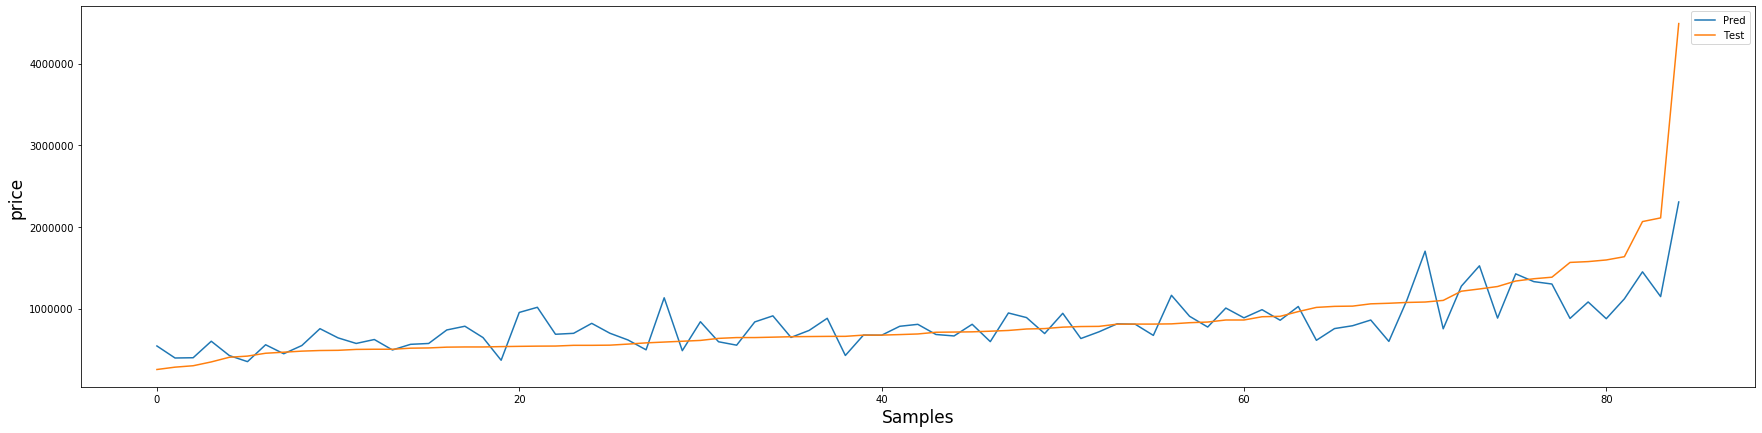

In [42]:
plt.figure(figsize=[30,7])
y_pred=y_pred.reshape(85,)
y_test=y_test.reshape(85,)
idx=np.argsort(y_test)
plt.plot(y_pred[idx])
plt.plot(y_test[idx])
plt.xlabel('Samples',fontsize=17)
plt.ylabel('price',fontsize=17)
plt.legend(['Pred', 'Test'])

---

## Seattle City  
####  เลือกดู Seattle เพราะว่า กราฟของ Seattle หลังตัดค่า Outlier มีข้อมูลเยอะที่สุด

In [43]:
city_2=dataset[dataset['city']=='Seattle']
city_2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,2014-05-02 00:00:00,2384000,5.0,2,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
5,2014-05-02 00:00:00,490000,2.0,1,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
9,2014-05-02 00:00:00,640000,4.0,2,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA
11,2014-05-02 00:00:00,1400000,4.0,2,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA
13,2014-05-02 00:00:00,365000,3.0,1,1090,6435,1.0,0,0,4,1090,0,1955,2009,2504 SW Portland Ct,Seattle,WA 98106,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4582,2014-07-07 00:00:00,406062,2.0,1,1290,4650,1.0,0,0,4,1290,0,1906,1990,312 NE 81st St,Seattle,WA 98115,USA
4585,2014-07-07 00:00:00,486895,3.0,1,1890,3330,1.5,0,0,4,1390,500,1901,0,4324 Dayton Ave N,Seattle,WA 98103,USA
4591,2014-07-08 00:00:00,396166,3.0,1,1880,5752,1.0,0,0,4,940,940,1945,0,3529 SW Webster St,Seattle,WA 98126,USA
4595,2014-07-09 00:00:00,308166,3.0,1,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA


### เทียบข้อมูล Seattle City กับค่า Price

In [44]:
c=city_2[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','condition','sqft_above','sqft_basement']]
d=city_2['price']

In [45]:
X = (c.values).reshape(1560,9)
y = (d.values).reshape(1560,1)

### แบ่งข้อมูล Train&Test ของ Seattle City

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print(f'Train X: {X_train.shape}')
print(f'Train y: {y_train.shape}')
print(f'Test X: {X_test.shape}')
print(f'Test y: {y_test.shape}')

Train X: (1092, 9)
Train y: (1092, 1)
Test X: (468, 9)
Test y: (468, 1)


In [47]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
reg.score(X_train,y_train)

0.6146742280933868

### ดูความสัมพันธ์ของข้อมูล (S)

In [49]:
reg.coef_

array([[-6.52560444e+04,  1.56338754e+04,  2.16119160e+02,
        -5.58307033e+00, -1.53524880e+04,  6.53647263e+05,
         6.38562342e+04,  2.15770965e+02,  3.48194888e-01]])

### ดูค่าที่ Predict (S)

In [50]:
y_pred = reg.predict(X_test)
y_pred.shape

(468, 1)

In [51]:
print(reg.predict(X_test[0].reshape((1,-1)))[0])

[788714.54261987]


In [52]:
y_test[0]

array([765000])

### เรียกดูค่า Error (S)

In [53]:
score = mean_squared_error(y_test, y_pred)
d=mean_absolute_error(y_test, y_pred)
print('mean_squred_error= {:.4f}'.format(score))
print('mean_absolute_error= {:.4f}'.format(d))

mean_squred_error= 40327263269.3199
mean_absolute_error= 142071.1921


### นำข้อมูลมา Plot Graph (S)

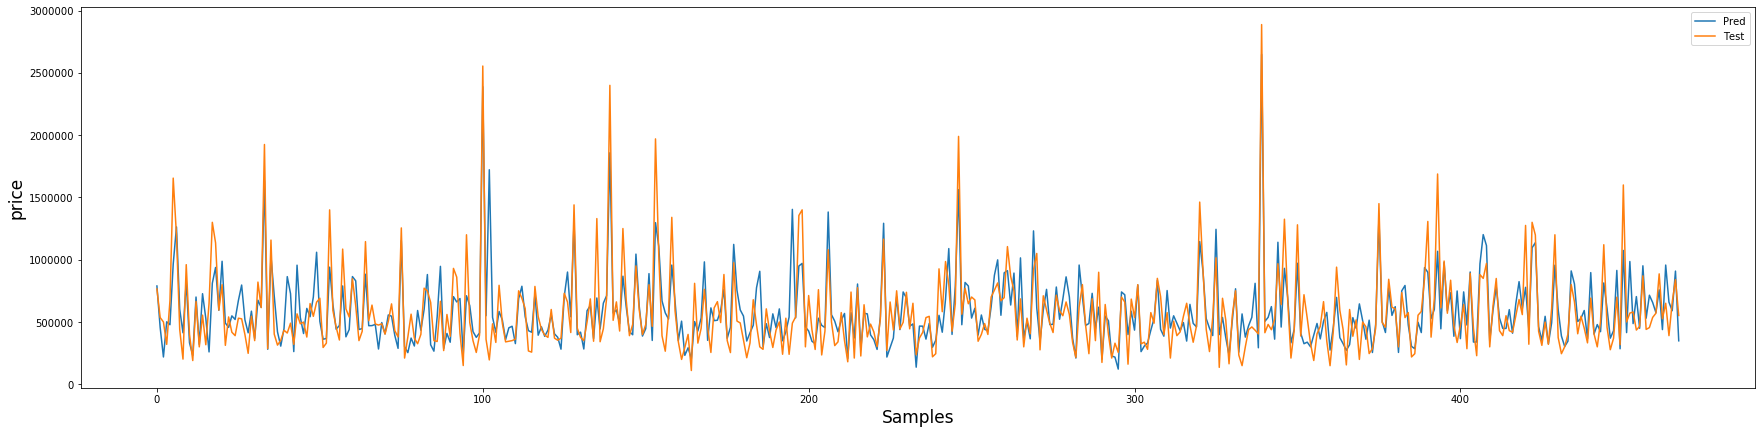

In [54]:
%matplotlib inline
plt.figure(figsize=[30,7])
plt.plot(y_pred)
plt.plot(y_test)
plt.xlabel('Samples',fontsize=17)
plt.ylabel('price',fontsize=17)
plt.legend(['Pred', 'Test'])

### นำค่า Test มาจัดเรียงเพื่อดู Graph ให้ง่ายขึ้น (S)

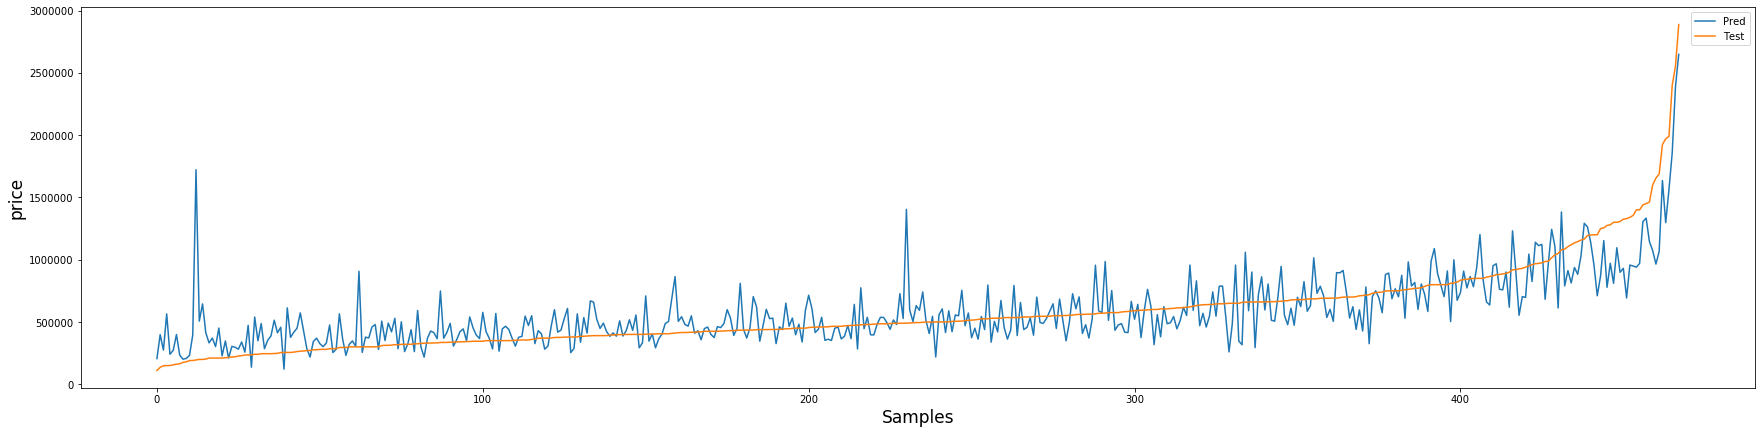

In [55]:
plt.figure(figsize=[30,7])
y_pred=y_pred.reshape(468,)
y_test=y_test.reshape(468,)
idx=np.argsort(y_test)
plt.plot(y_pred[idx])
plt.plot(y_test[idx])
plt.xlabel('Samples',fontsize=17)
plt.ylabel('price',fontsize=17)
plt.legend(['Pred', 'Test'])

---

## Kent City  
####  เลือกดู Kent เพราะว่า ก่อนตัดค่า Outlier Kent มีค่าสูงสุด

In [56]:
city_4=dataset[dataset['city']=='Kent']
city_4

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2,2014-05-02 00:00:00,342000,3.0,2,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
15,2014-05-02 00:00:00,242500,3.0,1,1200,9720,1.0,0,0,4,1200,0,1965,0,14034 SE 201st St,Kent,WA 98042,USA
63,2014-05-02 00:00:00,300000,3.0,2,2540,5050,2.0,0,0,3,2540,0,2006,0,29734 215th Terrace SE,Kent,WA 98042,USA
176,2014-05-06 00:00:00,284000,4.0,2,2000,5390,2.0,0,0,3,2000,0,2003,0,25434 160th Ave SE,Kent,WA 98042,USA
244,2014-05-07 00:00:00,310000,3.0,1,2070,37904,1.0,0,0,4,1420,650,1973,0,19654 116th Ave SE,Kent,WA 98031,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,2014-06-19 00:00:00,220083,3.0,1,1150,8079,1.0,0,0,4,1150,0,1983,0,12021 SE 251 Pl,Kent,WA 98030,USA
4547,2014-06-26 00:00:00,264270,3.0,2,1630,7700,1.0,0,0,3,1120,510,1978,0,9812 S 239th Pl,Kent,WA 98031,USA
4560,2014-06-30 00:00:00,132250,4.0,2,1830,8734,2.0,0,0,4,1830,0,1991,0,12116 SE 261st Ct,Kent,WA 98030,USA
4569,2014-07-02 00:00:00,268971,4.0,2,1954,4805,2.0,0,0,3,1954,0,2005,0,19320 113th Ave SE,Kent,WA 98031,USA


### เทียบข้อมูล Kent City กับค่า Price

In [57]:
g=city_4[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','condition','sqft_above','sqft_basement']]
h=city_4['price']

In [58]:
X = (g.values).reshape(183,9)
y = (h.values).reshape(183,1)

### แบ่งข้อมูล Train&Test ของ Kent City

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print(f'Train X: {X_train.shape}')
print(f'Train y: {y_train.shape}')
print(f'Test X: {X_test.shape}')
print(f'Test y: {y_test.shape}')

Train X: (128, 9)
Train y: (128, 1)
Test X: (55, 9)
Test y: (55, 1)


In [60]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
reg.score(X_train,y_train)

0.712217799979671

### ดูความสัมพันธ์ของข้อมูล (K)

In [62]:
reg.coef_

array([[-1.56490533e+04,  2.71021196e+04,  6.72837770e+01,
         8.47206624e-01, -3.31656400e+04, -3.63797881e-12,
        -7.03893783e+02,  5.73711615e+01,  9.91261556e+00]])

### ดูค่าที Predict (K)

In [63]:
y_pred = reg.predict(X_test)
y_pred.shape

(55, 1)

In [64]:
print(reg.predict(X_test[0].reshape((1,-1)))[0])

[229691.74571517]


In [65]:
y_test[0]

array([124740])

### เรียกดูค่า Error (K)

In [66]:
score = mean_squared_error(y_test, y_prebd)
d=mean_absolute_error(y_test, y_pred)
print('mean_squred_error= {:.4f}'.format(score))
print('mean_absolute_error= {:.4f}'.format(d))

mean_squred_error= 1930783342.7439
mean_absolute_error= 30963.6225


### นำข้อมูลมา Plot Graph (K)

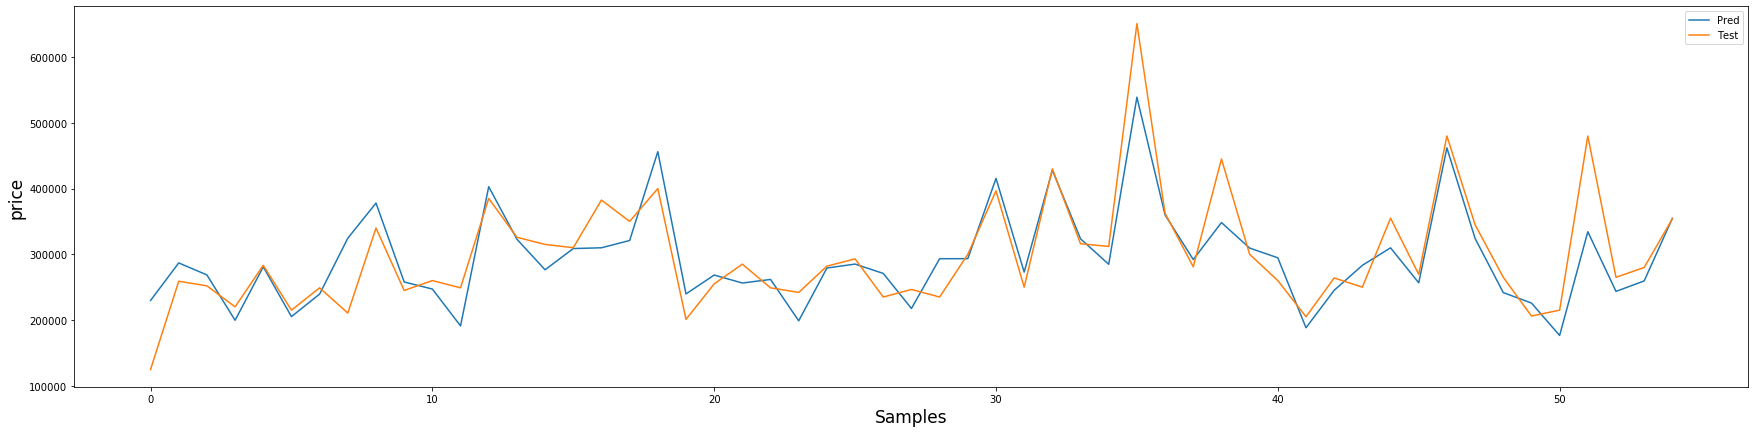

In [67]:
%matplotlib inline
plt.figure(figsize=[30,7])
plt.plot(y_pred)
plt.plot(y_test)
plt.xlabel('Samples',fontsize=17)
plt.ylabel('price',fontsize=17)
plt.legend(['Pred', 'Test'])

### นำค่า Test มาจัดเรียงเพื่อดู Graph ให้ง่ายขึ้น (K)

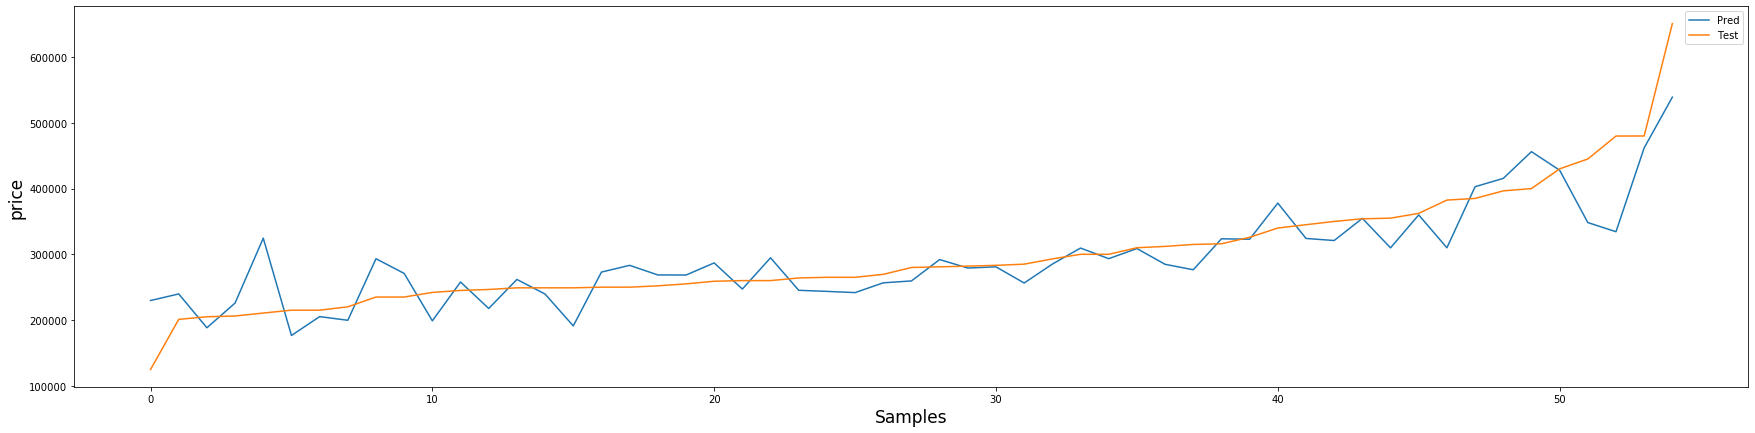

In [68]:
plt.figure(figsize=[30,7])
y_pred=y_pred.reshape(55,)
y_test=y_test.reshape(55,)
idx=np.argsort(y_test)
plt.plot(y_pred[idx])
plt.plot(y_test[idx])
plt.xlabel('Samples',fontsize=17)
plt.ylabel('price',fontsize=17)
plt.legend(['Pred', 'Test'])

#### จากข้อมูลข้างต้น สามารถสรุปได้ว่า city มีผลต่อการคาดการณ์ price หรือเมืองมีผลต่อการทํานายราคาบ้าน เพราะเมื่อเรานําcityมาใช้ ความแม่นยําของค่าที่เกิดจากการทํานายมี มากกว่าการที่ยังไม่ได้นําcityมาเกี่ยวข้อง และหลังจากที่ดูค่าความแม่นยําที่เพิ่มขึ้นแล้วนั้น เรายังได้หาค่า coefficient ของเมือง ซึ่งผลที่ออกมา ในแต่ละ attribute ทั้งค่าความแปรผันตรงหรือผกผันของcityนั้นแตกต่างไปจากตอนแรกที่ ใช้ตัวอย่างบ้านทั้งหมด และเมื่อดูค่า error ที่ออกมานั้น ทั้งค่า MSE และ MAE นั้นมีการลดลง โดยเฉพาะเมืองKent ที่ค่าลดลงอย่างมาก แต่ก็ยังมีเมืองBellevue ที่ค่า error ทั้ง MSE และ MAE นั้นเพิ่มขึ้น

* [go to top](#สารบัญ)